In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import geopandas as gpd

plt.style.use('ggplot')

In [2]:
df=pd.read_csv('DOHMH_Dog_Bite_Data.csv')

In [3]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,January 06 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,January 08 2018,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,January 09 2018,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
...,...,...,...,...,...,...,...,...,...
22658,10276,December 24 2017,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
22659,10277,December 24 2017,DOG,DUNKER,5,F,True,Staten Island,10303
22660,10278,December 21 2017,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
22661,10279,December 28 2017,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [4]:
df['DateOfBite']=pd.to_datetime(df['DateOfBite'])

In [5]:
df

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,2018-01-01,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,2018-01-04,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN
2,3,2018-01-06,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
3,4,2018-01-08,DOG,Mixed/Other,4,M,False,Brooklyn,11231
4,5,2018-01-09,DOG,Pit Bull,NaN,U,False,Brooklyn,11224
...,...,...,...,...,...,...,...,...,...
22658,10276,2017-12-24,DOG,CHIWEENIE MIX,7,M,True,Staten Island,10303
22659,10277,2017-12-24,DOG,DUNKER,5,F,True,Staten Island,10303
22660,10278,2017-12-21,DOG,"Schnauzer, Miniature",10M,M,True,Staten Island,10312
22661,10279,2017-12-28,DOG,Mixed/Other,NaN,F,False,Staten Island,10308


In [6]:
geodf=gpd.read_file(r'C:\Users\berid\python სავარჯიშოები\tl_2019_us_zcta510\tl_2019_us_zcta510.shp')

In [7]:
geodf.columns

Index(['ZCTA5CE10', 'GEOID10', 'CLASSFP10', 'MTFCC10', 'FUNCSTAT10', 'ALAND10',
       'AWATER10', 'INTPTLAT10', 'INTPTLON10', 'geometry'],
      dtype='object')

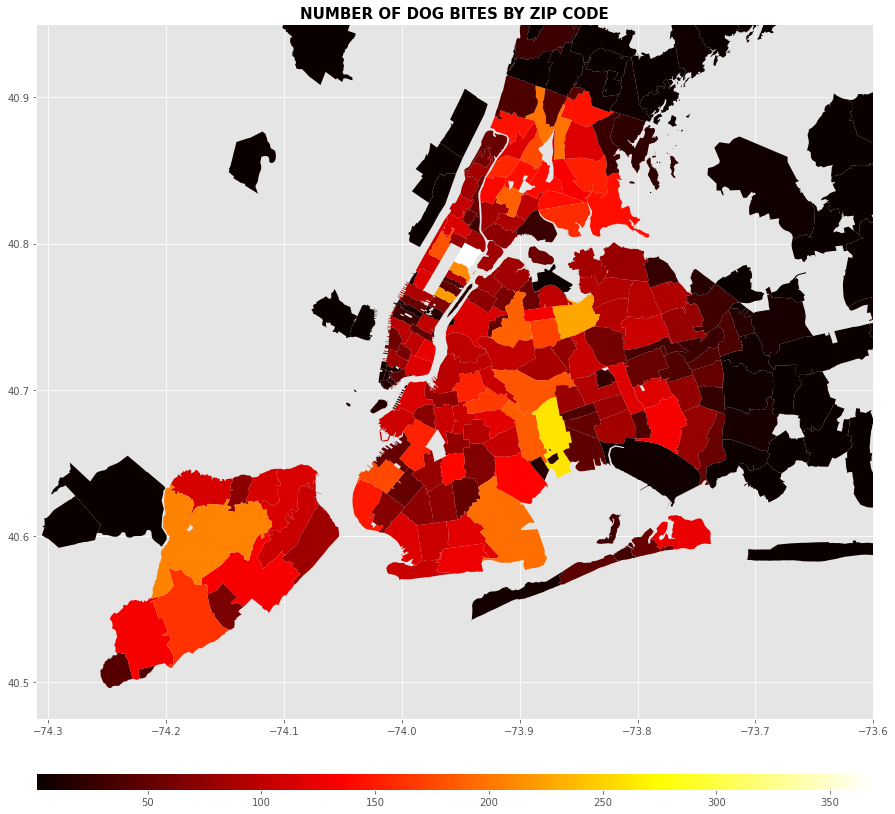

In [8]:
grouped=df.groupby('ZipCode')['UniqueID'].count().reset_index()
grouped=grouped.merge(geodf[['GEOID10','geometry']],left_on='ZipCode',right_on='GEOID10')
grouped=gpd.GeoDataFrame(grouped)

fig,ax=plt.subplots(figsize=(15,20))
grouped.plot(ax=ax,column='UniqueID',cmap='hot',legend=True,legend_kwds={'orientation':'horizontal','pad':0.05,'aspect':50})
plt.xlim(-74.31,-73.6)
plt.ylim(40.475,40.95)
plt.title('NUMBER OF DOG BITES BY ZIP CODE',size=15,fontweight='bold')
plt.show()

In [9]:
# There is a specific location in Manhatten, where dog bites is frequent

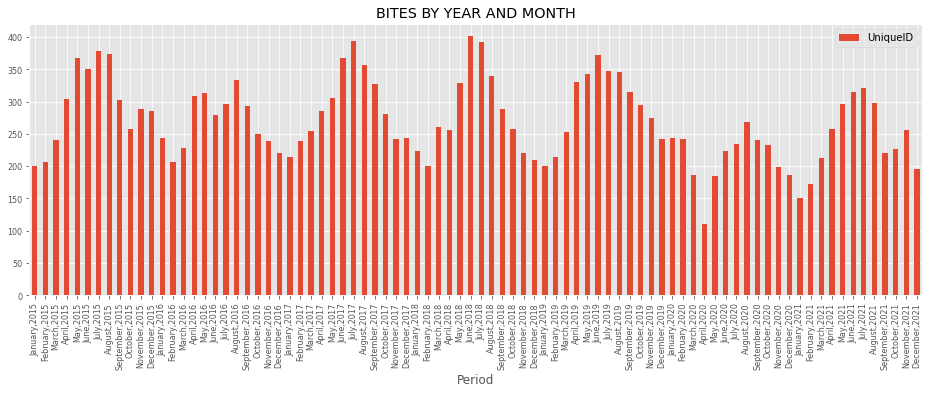

In [10]:
df['Year']=df['DateOfBite'].dt.year
df['Month']=df['DateOfBite'].dt.month_name()
df['monthnum']=df['DateOfBite'].dt.month

grouped=df.groupby(['Year','Month','monthnum'])['UniqueID'].count().reset_index().sort_values(['Year','monthnum'])
grouped['Period']=grouped['Month'].astype(str)+','+grouped['Year'].astype(str)
#df.drop(['Year','Month','monthnum'],axis=1,inplace=True)


grouped.plot(kind='bar',figsize=(16,5),x='Period',y='UniqueID',fontsize=8)
plt.title('BITES BY YEAR AND MONTH')
plt.xticks()
plt.show()

In [11]:
# most dog bites occur in summer, the least - in winter

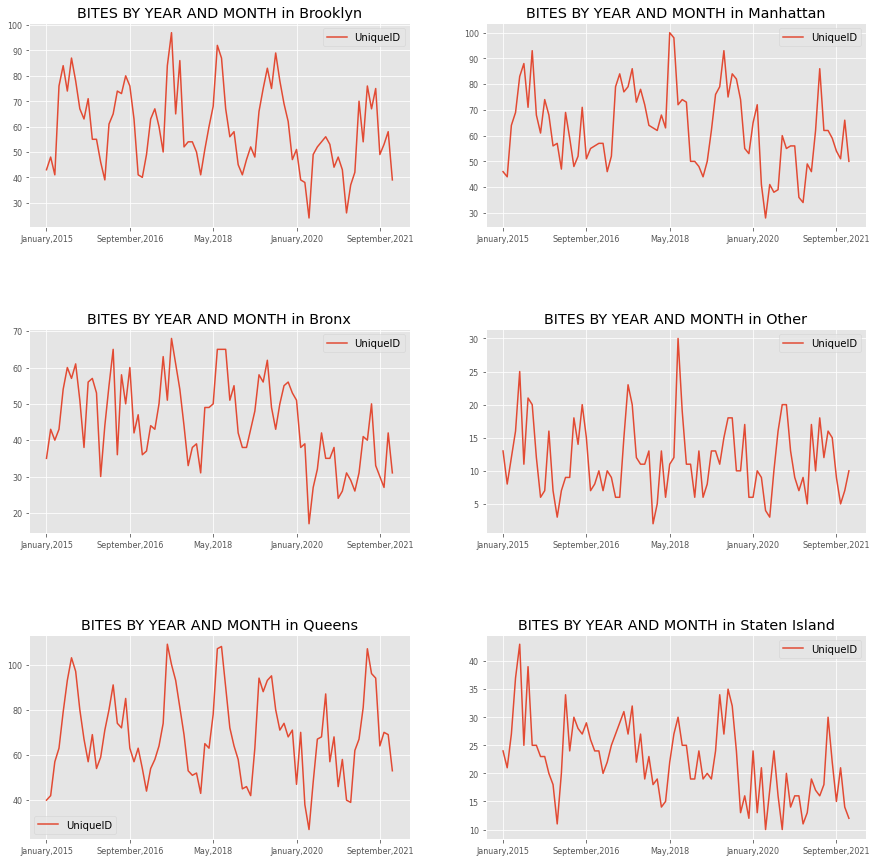

In [12]:
df['Year']=df['DateOfBite'].dt.year
df['Month']=df['DateOfBite'].dt.month_name()
df['monthnum']=df['DateOfBite'].dt.month


fig,axes=plt.subplots(3,2,figsize=(15,15))
for borough,ax in zip(df['Borough'].unique(),axes.ravel()):
    grouped=df.query('Borough==@borough').groupby(['Year','Month','monthnum'])['UniqueID'].count().reset_index().sort_values(['Year','monthnum'])
    grouped['Period']=grouped['Month'].astype(str)+','+grouped['Year'].astype(str)
    grouped.plot(ax=ax,kind='line',x='Period',y='UniqueID',fontsize=8,xlabel='')
    ax.set_title(f'BITES BY YEAR AND MONTH in {borough}')
plt.subplots_adjust(hspace=0.5)
plt.show()